# Assignment: kNN Regression Implementation

**DS322 -  Machine Learning** <br>
Faculty: Mr. Matthew R. Maulion, MSc

Name of Student: Jhibsam B. Palmes <br>
Section: DS3A

**Assignment.**

(**lndividual**) <br>

Consider again the Cosine signal sampled N times, i.e. <br>
&nbsp;&nbsp;&nbsp;&nbsp;X = np.linspace(0.0, 10.0, N) N = 150 <br>
&nbsp;&nbsp;&nbsp;&nbsp;y = np.cos(2 * np.pi * X)
    
Plot as a function of N the test accuracy for **n_neighbors** = 1, 3, 5, 10, 100. Provide 2-3 sentences analysis of your result (discuss something about underfitting/overfitting), use 75:25 training:test ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import mglearn #library provided by amueller
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts

import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.linspace(0.0, 10.0, 150)
y = np.cos(2 * np.pi * X)

Text(0, 0.5, 'Target')

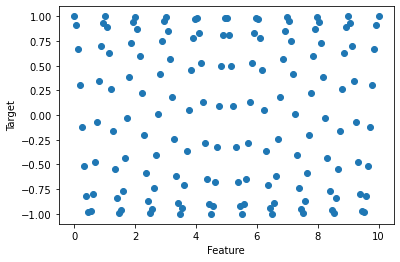

In [3]:
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from numpy import array

XX = np.reshape(X, (len(X),-1))

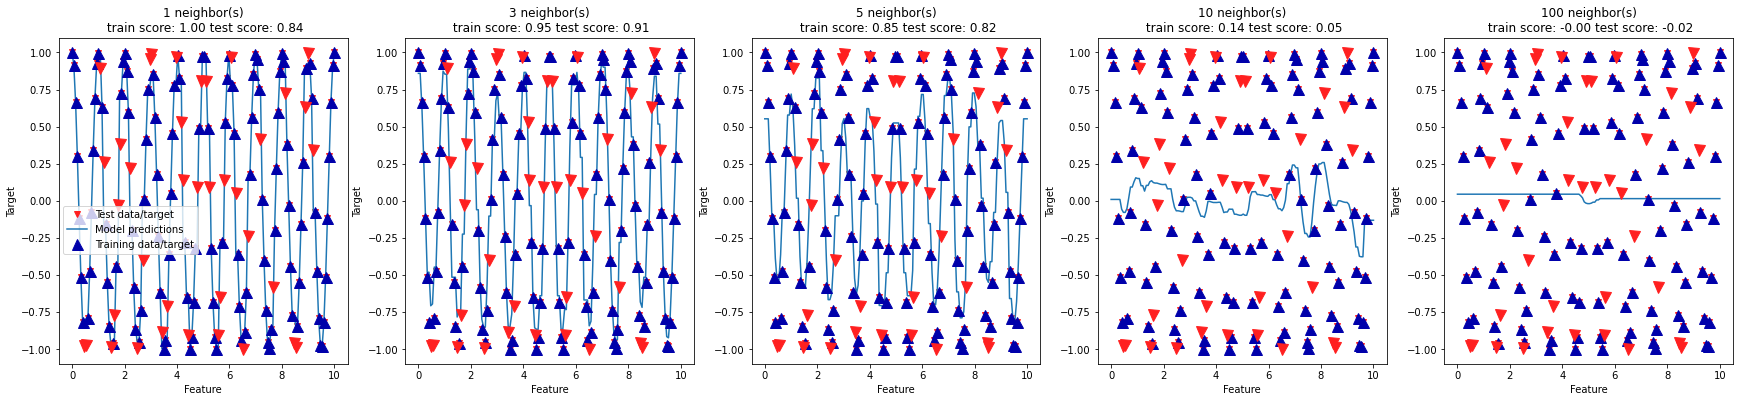

In [7]:
X_train, X_test, y_train, y_test = tts(XX, y, test_size=0.25, random_state=0)

fig, axes = plt.subplots(1, 5, figsize=(30, 6)) 
line = np.linspace(0.0, 10.0, len(XX)).reshape(len(XX), -1)

import pylab as plot 
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)

for n_neighbors, ax in zip([1, 3, 5, 10, 100], axes): # make predictions using 1, 3, 5, 10, 100 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='upper right', bbox_to_anchor=(0.5, 0.5))
pass

**Analysis of results**


Among the neighbors being visualized, the `"just right" number of neighbors is 3` with a test $R^2$ of **0.91**, while `n_neighbors = 1` is overfitting since the model performed very well on the training data but generalizes poorly to new data, and `n_neighbors = 5` had symmetry between train and test results, but both their $R^2$ is kind of low. Finally, `n_neighbors = 10 and 100` are heavily underfitting since the model performed poorly on both the training and test data. However, after trying n_neighbors = 2, 4, and 6, I found that the optimal number of neighbors is 2 with a test $R^2$ of 0.96, and after n_neighbors = 2, the train and test score starts to decline as n_neighbors increases.